# Выпускной проект: 

# <u>Предсказание оттока клиентов для оператора связи «ТелеДом»</u>

**Описание проекта**

Оператор связи «ТелеДом» хочет бороться с оттоком клиентов. Для этого его сотрудники начнут предлагать промокоды и специальные условия всем, кто планирует отказаться от услуг связи. Чтобы заранее находить таких пользователей, «ТелеДому» нужна модель, которая будет предсказывать, разорвёт ли абонент договор. Команда оператора собрала персональные данные о некоторых клиентах, информацию об их тарифах и услугах. Наша задача — обучить на этих данных модель для прогноза оттока клиентов.

**Описание услуг, предоставляемых оператором связи**

Оператор предоставляет два основных типа услуг:

* Стационарную телефонную связь. Телефон можно подключить к нескольким линиям одновременно.
* Интернет. Подключение может быть двух типов: через телефонную линию (DSL, от англ. digital subscriber line — «цифровая абонентская линия») или оптоволоконный кабель (Fiber optic).


Также доступны такие услуги:

* Интернет-безопасность: антивирус (DeviceProtection) и блокировка небезопасных сайтов (OnlineSecurity);
* Выделенная линия технической поддержки (TechSupport);
* Облачное хранилище файлов для резервного копирования данных (OnlineBackup);
* Стриминговое телевидение (StreamingTV) и каталог фильмов (StreamingMovies).

Клиенты могут платить за услуги каждый месяц или заключить договор на 1–2 года. Возможно оплатить счёт разными способами, а также получить электронный чек.

**Описание данных**

Данные состоят из нескольких файлов, полученных из разных источников:

* contract_new.csv — информация о договоре;
* personal_new.csv — персональные данные клиента;
* internet_new.csv — информация об интернет-услугах;
* phone_new.csv — информация об услугах телефонии.


<u>Файл `contract_new.csv`</u>

- `customerID` — идентификатор абонента;
- `BeginDate` — дата начала действия договора;
- `EndDate` — дата окончания действия договора;
- `Type` — тип оплаты: раз в год-два или ежемесячно;
- `PaperlessBilling` — электронный расчётный лист;
- `PaymentMethod` — тип платежа;
- `MonthlyCharges` — расходы за месяц;
- `TotalCharges` — общие расходы абонента.


<u>Файл `personal_new.csv`</u>

- `customerID` — идентификатор пользователя;
- `gender` — пол;
- `SeniorCitizen` — является ли абонент пенсионером;
- `Partner` — есть ли у абонента супруг или супруга;
- `Dependents` — есть ли у абонента дети.


<u>Файл `internet_new.csv`</u>

- `customerID` — идентификатор пользователя;
- `InternetService` — тип подключения;
- `OnlineSecurity` — блокировка опасных сайтов;
- `OnlineBackup` — облачное хранилище файлов для резервного копирования данных;
- `DeviceProtection` — антивирус;
- `TechSupport` — выделенная линия технической поддержки;
- `StreamingTV` — стриминговое телевидение;
- `StreamingMovies` — каталог фильмов.


<u>Файл `phone_new.csv`</u>

- `customerID` — идентификатор пользователя;
- `MultipleLines` — подключение телефона к нескольким линиям одновременно.


Во всех файлах столбец `customerID` содержит код клиента. Информация о договорах актуальна на *1 февраля 2020 года*.
Данные также находятся в тренажёре, в папке `/datasets/`.

**План работы**

- *Шаг 1.* Загрузка данных

Загрузка данных и выполнение их первичного осмотра.

- *Шаг 2.* Исследовательский анализ и предобработка данных

Выполнение исследовательского анализа каждого датафрейма и при необходимости выполнение предобработки. Выводы об имеющихся признаках: понадобятся ли они для обучения моделей.

- *Шаг 3.* Объединение данных

Объединение выбранных признаков в один датафрейм по ключу.

- *Шаг 4.* Исследовательский анализ и предобработка данных объединённого датафрейма

Исследовательский анализ объединённого датафрейма, визуализация распределения признаков и при необходимости выполнение предобработки. Корреляционный анализ. Можно использовать не только имеющиеся признаки, но и генерировать новые.

- *Шаг 5.* Подготовка данных

Подготовка данных для обучения модели. Разделение данных на две выборки, при масштабировании и кодировании необходимо учитывать особенности данных и моделей.

- *Шаг 6.* Обучение моделей машинного обучения

Обучение как минимум двух моделей. Хотя бы для одной из них необходимо подобрать как минимум два гиперпараметра.

- *Шаг 7.* Выбор лучшей модели

Выбор лучшей модели и проверка её качества на тестовой выборке.

- *Шаг 8.* Общий вывод и рекомендации заказчику

Общий вывод о проделанной работе: описание основных этапов работы, полученных результатов и рекомендации для бизнеса.

## Загрузка данных

In [1]:
! pip install phik -q

Импортируем необходимые для работы библиотеки.

In [126]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import phik


from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler
from sklearn.metrics import confusion_matrix

from sklearn.linear_model import LogisticRegression
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier

from sklearn.dummy import DummyClassifier

from sklearn.metrics import roc_auc_score


pd.set_option('display.max_columns', None)
RANDOM_STATE = 80424

%matplotlib inline

Сохраним предоставленные датафреймы в переменные.

In [3]:
contract = pd.read_csv('datasets/contract_new.csv')
personal = pd.read_csv('datasets/personal_new.csv')
internet = pd.read_csv('datasets/internet_new.csv')
phone = pd.read_csv('datasets/phone_new.csv')

Теперь познакомимся с каждым датафреймом отдельно.

In [4]:
# посмотрим первые строки датафрейма contract
contract.head()

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,7590-VHVEG,2020-01-01,No,Month-to-month,Yes,Electronic check,29.85,31.04
1,5575-GNVDE,2017-04-01,No,One year,No,Mailed check,56.95,2071.84
2,3668-QPYBK,2019-10-01,No,Month-to-month,Yes,Mailed check,53.85,226.17
3,7795-CFOCW,2016-05-01,No,One year,No,Bank transfer (automatic),42.30,1960.6
4,9237-HQITU,2019-09-01,No,Month-to-month,Yes,Electronic check,70.70,353.5


In [5]:
# посмотрим общую информацию
contract.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   BeginDate         7043 non-null   object 
 2   EndDate           7043 non-null   object 
 3   Type              7043 non-null   object 
 4   PaperlessBilling  7043 non-null   object 
 5   PaymentMethod     7043 non-null   object 
 6   MonthlyCharges    7043 non-null   float64
 7   TotalCharges      7043 non-null   object 
dtypes: float64(1), object(7)
memory usage: 440.3+ KB


Датафрейм `contract` содержит `7043` строки и `8` столбцов, пропусков нет, данные представлены в основном строковыми значениями, только столбец `MonthlyCharges` содержит целочисленные значения. 

В разделе предобработки данных формат значений в столбцах `BeginDate` и `EndDate` заменим со строкового на *datetime64*, формат значений в столбце `TotalCharges` заменим на *float64*. Также стоит преобразовать названия столбцов и заменить *CamelCase* на *snake_case* в соответствии с принятыми стандартами.

In [6]:
# посмотрим первые строки датафрейма personal
personal.head()

,customerID,gender,SeniorCitizen,Partner,Dependents
0,7590-VHVEG,Female,0,Yes,No
1,5575-GNVDE,Male,0,No,No
2,3668-QPYBK,Male,0,No,No
3,7795-CFOCW,Male,0,No,No
4,9237-HQITU,Female,0,No,No


In [7]:
# посмотрим общую информацию
personal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerID     7043 non-null   object
 1   gender         7043 non-null   object
 2   SeniorCitizen  7043 non-null   int64 
 3   Partner        7043 non-null   object
 4   Dependents     7043 non-null   object
dtypes: int64(1), object(4)
memory usage: 275.2+ KB


Датафрейм `personal` содержит `7043` строки и `5` столбцов, пропусков нет, данные представлены в основном строковыми значениями, только столбец `SeniorCitizen` содержит целочисленные значения. 

В разделе предобработки данных формат значений в столбце `SeniorCitizen` заменим с целочисленого (`0/1`) на строковый (`No/Yes`), поскольку здесь содержатся не числовые данные, а категориальные. Также стоит преобразовать названия столбцов и заменить *CamelCase* на *snake_case* в соответствии с принятыми стандартами.

In [8]:
# посмотрим первые строки датафрейма internet
internet.head()

,customerID,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,Fiber optic,No,No,No,No,No,No


In [9]:
# посмотрим общую информацию
internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5517 entries, 0 to 5516
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   customerID        5517 non-null   object
 1   InternetService   5517 non-null   object
 2   OnlineSecurity    5517 non-null   object
 3   OnlineBackup      5517 non-null   object
 4   DeviceProtection  5517 non-null   object
 5   TechSupport       5517 non-null   object
 6   StreamingTV       5517 non-null   object
 7   StreamingMovies   5517 non-null   object
dtypes: object(8)
memory usage: 344.9+ KB


Датафрейм `internet` содержит `5517` строк и `8` столбцов, пропусков нет, данные представлены строковыми значениями. 

Формат значений в столбцах соответствует данным, замена здесь не требуется, но стоит преобразовать названия столбцов и заменить *CamelCase* на *snake_case* в соответствии с принятыми стандартами.

In [10]:
# посмотрим первые строки датафрейма phone
phone.head()

,customerID,MultipleLines
0,5575-GNVDE,No
1,3668-QPYBK,No
2,9237-HQITU,No
3,9305-CDSKC,Yes
4,1452-KIOVK,Yes


In [11]:
# посмотрим общую информацию
phone.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6361 entries, 0 to 6360
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerID     6361 non-null   object
 1   MultipleLines  6361 non-null   object
dtypes: object(2)
memory usage: 99.5+ KB


Датафрейм `phone` содержит `6361` строку и `2` столбца, пропусков нет, данные представлены строковыми значениями. 

Формат значений в столбцах соответствует данным, замена здесь не требуется, но стоит преобразовать названия столбцов и заменить *CamelCase* на *snake_case* в соответствии с принятыми стандартами.

**Вывод:**

Во всех предоставленных датафреймах нет пропусков, но количество записей в них разное: в датасетах `internet` и `phone` содержится меньше записей, чем в датафреймах `conract` и `personal`. Причина несоответсвия количества записей может заключаться в том, что некоторые абоненты не пользовались соответствующими услугами.

В разделе предобработки данных в датафрейме `contract` заменим формат значений в столбцах `BeginDate` и `EndDate` со строкового на *datetime64*, формат значений в столбце `TotalCharges` заменим на *float64*, в датафрейме `personal` формат значений в столбце `SeniorCitizen` заменим с целочисленого (`0/1`) на строковый (`No/Yes`).

Во всех датафреймах следует преобразовать названия столбцов и заменить *CamelCase* на *snake_case* в соответствии с принятыми стандартами.

В предоставленных датафреймах не обнаружен целевой признак, его придется выделить самостоятельно.

## Исследовательский анализ и предобработка данных

<u>Предобработка</u>

Изменим формат названий столбцов в датафреймах с *CamelCase* на *snake_case* в соответствии с принятыми стандартами. Но сначала там, где нужно, приведем названия к нижнему регистру, поскольку некоторые названия столбцов состоят из одного слова.

Поработаем с первым датафреймом — `contract`.

In [12]:
contract.columns = contract.columns.str.lower()

In [13]:
# выведем названия столбцов датафрейма
contract.columns

Index(['customerid', 'begindate', 'enddate', 'type', 'paperlessbilling',
       'paymentmethod', 'monthlycharges', 'totalcharges'],
      dtype='object')

Изменим названия столбцов и в этом датафрейме.

In [14]:
column_mapping = {
    'customerid': 'customer_id',
    'begindate': 'begin_date',
    'enddate': 'end_date',
    'paperlessbilling': 'paperless_billing',
    'paymentmethod': 'payment_method',
    'monthlycharges': 'monthly_charges',
    'totalcharges': 'total_charges'
}

contract.rename(columns=column_mapping, inplace=True)

Посмотрим, что получилось.

In [15]:
contract.head()

,customer_id,begin_date,end_date,type,paperless_billing,payment_method,monthly_charges,total_charges
0,7590-VHVEG,2020-01-01,No,Month-to-month,Yes,Electronic check,29.85,31.04
1,5575-GNVDE,2017-04-01,No,One year,No,Mailed check,56.95,2071.84
2,3668-QPYBK,2019-10-01,No,Month-to-month,Yes,Mailed check,53.85,226.17
3,7795-CFOCW,2016-05-01,No,One year,No,Bank transfer (automatic),42.30,1960.6
4,9237-HQITU,2019-09-01,No,Month-to-month,Yes,Electronic check,70.70,353.5


Замена выполнена успешно.

Поработаем со вторым датафреймом — `personal`.

In [16]:
personal.columns = personal.columns.str.lower()

In [17]:
# выведем названия столбцов датафрейма
personal.columns

Index(['customerid', 'gender', 'seniorcitizen', 'partner', 'dependents'], dtype='object')

Изменим названия столбцов и в этом датафрейме.

In [18]:
column_mapping = {
    'customerid': 'customer_id',
    'seniorcitizen': 'senior_citizen'
}

personal.rename(columns=column_mapping, inplace=True)

Посмотрим, что получилось.

In [19]:
personal.head()

,customer_id,gender,senior_citizen,partner,dependents
0,7590-VHVEG,Female,0,Yes,No
1,5575-GNVDE,Male,0,No,No
2,3668-QPYBK,Male,0,No,No
3,7795-CFOCW,Male,0,No,No
4,9237-HQITU,Female,0,No,No


Замена выполнена успешно.

Поработаем с третьим датафреймом — `internet`.

In [20]:
# выведем названия столбцов датафрейма
internet.columns

Index(['customerID', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies'],
      dtype='object')

Изменим названия столбцов и в этом датафрейме.

In [21]:
column_mapping = {
    'customerID': 'customer_id',
    'InternetService': 'internet_service',
    'OnlineSecurity': 'online_security',
    'OnlineBackup': 'online_backup',
    'DeviceProtection': 'device_protection',
    'TechSupport': 'tech_support',
    'StreamingTV': 'streaming_tv',
    'StreamingMovies': 'streaming_movies'
}

internet.rename(columns=column_mapping, inplace=True)

Посмотрим, что получилось.

In [22]:
internet.head()

,customer_id,internet_service,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies
0,7590-VHVEG,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,Fiber optic,No,No,No,No,No,No


Замена выполнена успешно.

Поработаем с последним датафреймом — `phone`.

In [23]:
# выведем названия столбцов датафрейма
phone.columns

Index(['customerID', 'MultipleLines'], dtype='object')

Изменим названия столбцов и в этом датафрейме.

In [24]:
column_mapping = {
    'customerID': 'customer_id',
    'MultipleLines': 'multiple_lines'
}

phone.rename(columns=column_mapping, inplace=True)

Посмотрим, что получилось.

In [25]:
phone.head()

,customer_id,multiple_lines
0,5575-GNVDE,No
1,3668-QPYBK,No
2,9237-HQITU,No
3,9305-CDSKC,Yes
4,1452-KIOVK,Yes


Итак, изменение формата названий столбцов выполнена успешно во всех датафреймах, теперь названия соответствуют общепринятому стандарту (*snake_case*).

-------------------

Теперь приступим к изменению формата данных в столбцах, где это необходимо.

Изменим текущий строковый формат столбца с датой начала действия договоров в датафрейме `contract` на *datetime64*.

In [26]:
contract['begin_date'] = pd.to_datetime(contract['begin_date'], format='%Y-%m-%d')

In [27]:
# убедимся, что изменения выполнены успешно
contract.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   customer_id        7043 non-null   object        
 1   begin_date         7043 non-null   datetime64[ns]
 2   end_date           7043 non-null   object        
 3   type               7043 non-null   object        
 4   paperless_billing  7043 non-null   object        
 5   payment_method     7043 non-null   object        
 6   monthly_charges    7043 non-null   float64       
 7   total_charges      7043 non-null   object        
dtypes: datetime64[ns](1), float64(1), object(6)
memory usage: 440.3+ KB


Аналогичным образом не получится поступить со столбцом окончания действия договора, подобная операция вызывает ошибку. Посмотрим, почему так происходит.

In [28]:
contract['end_date'].value_counts()

end_date
No            5942
2020-01-01      39
2019-12-01      38
2018-11-01      35
2019-09-01      32
              ... 
2014-09-01       2
2014-12-01       2
2014-06-01       1
2014-10-01       1
2014-11-01       1
Name: count, Length: 67, dtype: int64

Итак, мы видим, что вместо даты окончания договора у `5942` записей стоит значение `No`, которое невозможно преобразовать в формат *datetime64*.

Заполним `No` датой предоставления данных `2020-02-01` (*1 февраля 2020 года*).

In [29]:
contract.loc[(contract['end_date'] == 'No'), 'end_date'] = '2020-02-01'

In [30]:
contract['end_date'].value_counts()

end_date
2020-02-01    5942
2020-01-01      39
2019-12-01      38
2018-11-01      35
2019-09-01      32
              ... 
2014-09-01       2
2014-12-01       2
2014-06-01       1
2014-10-01       1
2014-11-01       1
Name: count, Length: 67, dtype: int64

Теперь можно изменить формат данных в этом столбце.

In [31]:
contract['end_date'] = pd.to_datetime(contract['end_date'], format='%Y-%m-%d')

In [32]:
# убедимся, что изменения выполнены успешно
contract.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   customer_id        7043 non-null   object        
 1   begin_date         7043 non-null   datetime64[ns]
 2   end_date           7043 non-null   datetime64[ns]
 3   type               7043 non-null   object        
 4   paperless_billing  7043 non-null   object        
 5   payment_method     7043 non-null   object        
 6   monthly_charges    7043 non-null   float64       
 7   total_charges      7043 non-null   object        
dtypes: datetime64[ns](2), float64(1), object(5)
memory usage: 440.3+ KB


Формат даты-времени успешно применен к данным в столбцах начала и окончания действия договоров.

Теперь изменим формат данных столбца `total_charges` датафрейма `contract` со строкового на вещественный.

Но при попытке изменения формата данных опять получаем ошибку, разберемся, что не так.

In [33]:
contract['total_charges'].value_counts()

total_charges
           11
20.45       6
101.0       5
21.53       4
40.1        4
           ..
4357.5      1
3509.55     1
2530.8      1
2599.1      1
7251.82     1
Name: count, Length: 6658, dtype: int64

Итак, мы видим, что 11 записей содержат пустую строку вместо числа, т. е. на момент формирования таблицы платеж отсутствовал, обработаем эти записи, заметив пустую строку на `0`.

In [34]:
contract.loc[(contract['total_charges'] == ' '), 'total_charges'] = '0.00'

Теперь можно выполнить преобразование данных в вещественные.

In [35]:
contract['total_charges'] = contract['total_charges'].astype(float)

In [36]:
# убедимся, что изменения выполнены успешно
contract.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   customer_id        7043 non-null   object        
 1   begin_date         7043 non-null   datetime64[ns]
 2   end_date           7043 non-null   datetime64[ns]
 3   type               7043 non-null   object        
 4   paperless_billing  7043 non-null   object        
 5   payment_method     7043 non-null   object        
 6   monthly_charges    7043 non-null   float64       
 7   total_charges      7043 non-null   float64       
dtypes: datetime64[ns](2), float64(2), object(4)
memory usage: 440.3+ KB


Теперь изменим формат значений в столбце `senior_citizen` датафрейма `personal` с целочисленого (`0/1`) на строковый (`No/Yes`).

In [37]:
personal['senior_citizen'] = personal['senior_citizen'].replace(0, 'No')
personal['senior_citizen'] = personal['senior_citizen'].replace(1, 'Yes')

In [38]:
# убедимся, что изменения выполнены успешно
personal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   customer_id     7043 non-null   object
 1   gender          7043 non-null   object
 2   senior_citizen  7043 non-null   object
 3   partner         7043 non-null   object
 4   dependents      7043 non-null   object
dtypes: object(5)
memory usage: 275.2+ KB


-----------------

С форматом данных разобрались, приступим к **исследовательскому анализу**.

<u>Датафрейм `contract`</u>

In [39]:
contract.sample(10)

,customer_id,begin_date,end_date,type,paperless_billing,payment_method,monthly_charges,total_charges
6495,7254-IQWOZ,2019-09-01,2020-02-01,Month-to-month,Yes,Electronic check,69.65,351.73
2690,2397-BRLOM,2019-04-01,2020-02-01,Month-to-month,Yes,Credit card (automatic),80.45,804.50
1944,0420-BWTPW,2019-02-01,2020-02-01,Month-to-month,No,Mailed check,25.50,306.00
3802,7698-YFGEZ,2020-01-01,2020-02-01,Month-to-month,No,Mailed check,20.00,22.00
4884,2359-KLTEK,2016-09-01,2020-02-01,Month-to-month,Yes,Bank transfer (automatic),94.90,3890.90
260,7273-TEFQD,2019-08-01,2020-02-01,Month-to-month,Yes,Electronic check,41.15,246.90
4819,0607-DAAHE,2015-06-01,2019-03-01,Two year,No,Bank transfer (automatic),19.75,933.19
614,7138-GIRSH,2015-12-01,2020-02-01,Two year,No,Bank transfer (automatic),69.50,3475.00
1841,8958-JPTRR,2015-06-01,2020-02-01,One year,No,Electronic check,24.30,1388.02
4561,9415-TPKRV,2019-06-01,2020-02-01,Month-to-month,No,Electronic check,55.75,446.00


In [40]:
# посмотрим общую информацию о датафрейме
contract.describe(include='all').T

,count,unique,top,freq,mean,min,25%,50%,75%,max,std
customer_id,7043,7043,7590-VHVEG,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
begin_date,7043,NaN,NaN,NaN,2017-04-30 13:01:50.918642688,2013-10-01 00:00:00,2015-06-01 00:00:00,2017-09-01 00:00:00,2019-04-01 00:00:00,2020-02-01 00:00:00,NaN
end_date,7043,NaN,NaN,NaN,2019-10-16 02:22:05.912253440,2014-06-01 00:00:00,2020-02-01 00:00:00,2020-02-01 00:00:00,2020-02-01 00:00:00,2020-02-01 00:00:00,NaN
type,7043,3,Month-to-month,3875,NaN,NaN,NaN,NaN,NaN,NaN,NaN
paperless_billing,7043,2,Yes,4171,NaN,NaN,NaN,NaN,NaN,NaN,NaN
payment_method,7043,4,Electronic check,2365,NaN,NaN,NaN,NaN,NaN,NaN,NaN
monthly_charges,7043.0,NaN,NaN,NaN,64.761692,18.25,35.5,70.35,89.85,118.75,30.090047
total_charges,7043.0,NaN,NaN,NaN,2115.312885,0.0,436.75,1343.35,3236.69,9221.38,2112.742814


Посмотрим на распределение значений в *числовых признаках*.

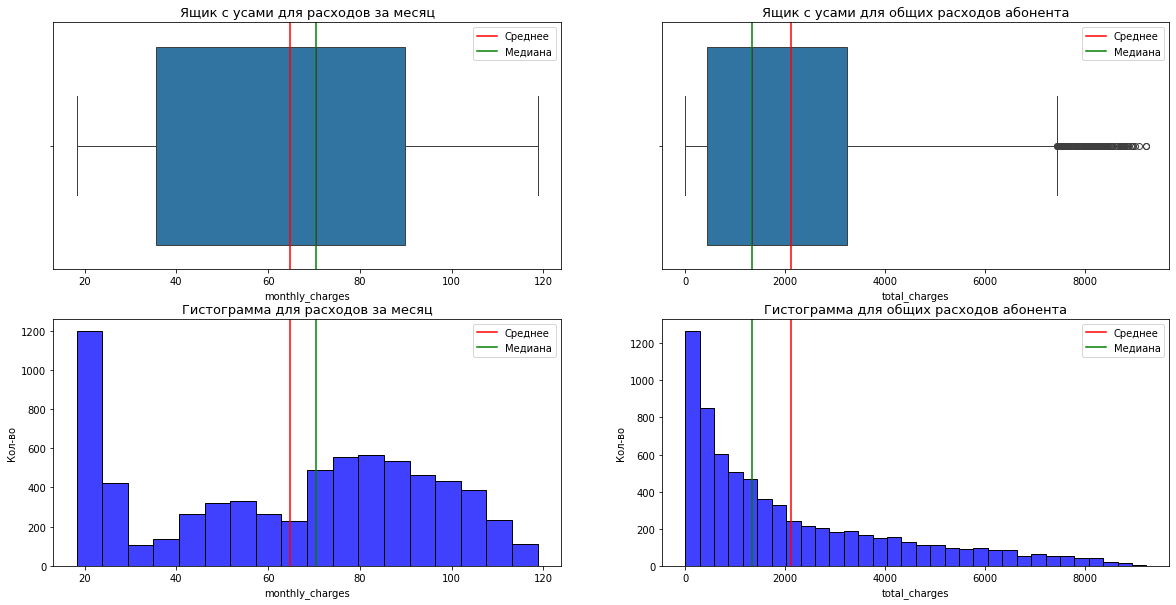

In [41]:
plt.figure(figsize=(20, 10))

# построение ящков с усами
plt.subplot(2, 2, 1)
plt.title('Ящик с усами для расходов за месяц', fontsize=13)
sns.boxplot(data=contract['monthly_charges'], orient='h')
plt.axvline(np.mean(contract['monthly_charges']), color='r', linestyle='-', label='Среднее')
plt.axvline(np.median(contract['monthly_charges']), color='green', linestyle='-', label='Медиана')
plt.legend();

plt.subplot(2, 2, 2)
plt.title('Ящик с усами для общих расходов абонента', fontsize=13)
sns.boxplot(data=contract['total_charges'], orient='h')
plt.axvline(np.mean(contract['total_charges']), color='r', linestyle='-', label='Среднее')
plt.axvline(np.median(contract['total_charges']), color='green', linestyle='-', label='Медиана')
plt.legend();

# построение гистограмм
plt.subplot(2, 2, 3)
plt.title('Гистограмма для расходов за месяц', fontsize=13)
sns.histplot(data=contract['monthly_charges'], color='b', kde=False)
plt.axvline(np.mean(contract['monthly_charges']), color='r', linestyle='-', label='Среднее')
plt.axvline(np.median(contract['monthly_charges']), color='green', linestyle='-', label='Медиана')
plt.ylabel('Кол-во')
plt.legend();

plt.subplot(2, 2, 4)
plt.title('Гистограмма для общих расходов абонента', fontsize=13)
sns.histplot(data=contract['total_charges'], color='b', kde=False)
plt.axvline(np.mean(contract['total_charges']), color='r', linestyle='-', label='Среднее')
plt.axvline(np.median(contract['total_charges']), color='green', linestyle='-', label='Медиана')
plt.ylabel('Кол-во')
plt.legend()

plt.show();

Как можно видеть из получившихся графиков, медианное значение *расходов за месяц* больше среднего значения, это указывает на то, что распределение данных смещено вправо, то есть имеет положительную или правостороннюю асимметрию. Выбросов здесь не обнаружено.

Для *общих расходов* медианное значение меньше среднего, это указывает на то, что распределение данных смещено влево, то есть имеет отрицательную или левостороннюю асимметрию. Здесь мы видим некоторое количество выбросов. Обрабатывать их никак не будем, поскольку, вероятнее всего, это реальные затраты клиентов.

Необычно высокие значения в начале гистограммы для столбца `monthly_charges` можно объяснить тем, что на момент заключения контрактов для клиентов действовала какая-то бонусная программа или специальный тариф. Высокие значения в начале гистограммы для столбца `total_charges` можно объяснить тем, что клиенты пользовались услугами недолго и в дальнейшем спрос на них упал, как и затраты.

Теперь рассмотрим распределение *категориальных признаков*. На этом этапе добавим в датафрейм `contract` столбец, который будет содержать целевую переменную. Ее мы определим следующим образом: признак `end_date` содержит даты расторжения договоров, ранее мы заменили значение `No` (договор действующий) в этом столбце датой предоставления данных `2020-02-01` (*1 февраля 2020 года*), теперь обозначим это значение `0` (договор **не расторгнут**), а остальные даты — значением `1` (договор **расторгнут**), и создадим новый столбец `target_value`.

In [42]:
contract['target_value'] = contract['end_date'].apply(lambda x: 0 if x == pd.Timestamp('2020-02-01') else 1)

Посмотрим на получившуюся таблицу.

In [43]:
contract.sample(10)

,customer_id,begin_date,end_date,type,paperless_billing,payment_method,monthly_charges,total_charges,target_value
889,7549-MYGPK,2014-07-01,2017-06-01,Month-to-month,Yes,Electronic check,100.55,3519.25,1
1273,9681-KYGYB,2016-01-01,2019-01-01,Month-to-month,Yes,Electronic check,88.20,3333.96,1
6849,5060-TQUQN,2017-08-01,2020-02-01,Month-to-month,Yes,Bank transfer (automatic),83.55,2732.09,0
6775,3259-KNMRR,2015-05-01,2020-02-01,Two year,Yes,Bank transfer (automatic),79.75,4591.21,0
1782,8623-ULFNQ,2017-12-01,2020-02-01,Month-to-month,Yes,Electronic check,66.05,1717.30,0
6721,6898-RBTLU,2016-01-01,2019-04-01,Two year,No,Bank transfer (automatic),79.30,3092.70,1
3586,8722-NGNBH,2019-07-01,2020-02-01,Month-to-month,No,Mailed check,40.00,288.40,0
5994,9661-ACXBS,2016-06-01,2019-03-01,Month-to-month,Yes,Electronic check,105.20,3818.76,1
953,0851-DFJKB,2018-11-01,2020-02-01,Month-to-month,No,Electronic check,58.95,910.78,0
3366,1855-AGAWH,2017-07-01,2020-02-01,One year,Yes,Electronic check,93.80,3082.27,0


In [44]:
# посмотрим столбец с датой окончания договоров
contract['target_value'].value_counts()

target_value
0    5942
1    1101
Name: count, dtype: int64

Теперь можно рассмотреть распределение категориальных признаков в контексте целевой переменной. Построим гистограммы.

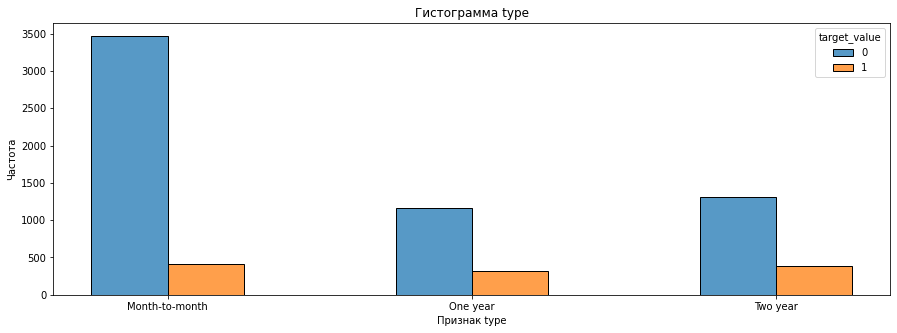

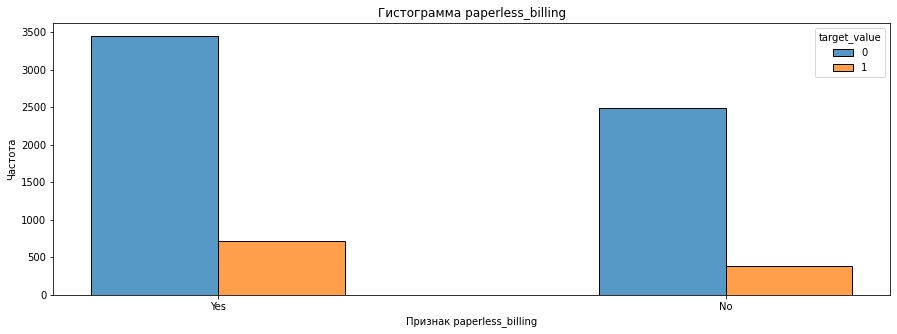

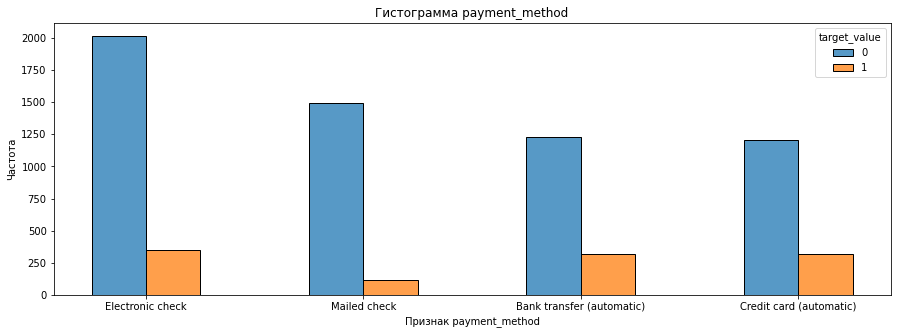

In [45]:
for item in ['type', 'paperless_billing', 'payment_method']:
    plt.figure(figsize=(15, 5))
    sns.histplot(data=contract, x=item, hue='target_value', multiple='dodge', shrink=0.5)
    plt.ylabel('Частота')
    plt.xlabel(f'Признак {item}')
    plt.title(f'Гистограмма {item}')
    plt.show();

Из получившихся графиков видно, что вероятность ухода клиента примерно одинаковая при любой периодичности оплаты, однако значительная часть клиентов, которые продолжают пользоваться услугами компании, предпочитает ежемесячную форму оплаты.

Клиенты, использующие электронные расчетные листы и не использующие таковые, остаются в компании или продолжают пользоваться ее услугами примерно в одинаковом соотношении.

Большинство оставшихся клиентов пользуются электронными чеками, меньше всего уходит клиентов, которым выставляют счет по почте, но, вероятно, в целом не так много людей, которым удобен подобный вид оплаты. Два другие способа оплаты примерно одинаково пользуются популярностью у тех, кто остается и кто уходит.

Теперь создадим еще один столбец с длительностью сотрудничества клиентов с компанией. После этого можно удалить столбцы с датами начала и завершения договора, поскольку у нас будет вся необходимая информация: срок сотрудничества и (на основе даты расторжения договора, столбец `target_value`) информация о том, ушел клиент или нет.

Для того, чтобы создать столбец с длительностью сотрудничества в днях, вычтем из даты расторжения договора дату его заключения.

In [46]:
contract['coop_duration'] = (contract['end_date'] - contract['begin_date']).dt.days

In [47]:
# убедимся, что операция выполнена успешно
contract.sample(5)

,customer_id,begin_date,end_date,type,paperless_billing,payment_method,monthly_charges,total_charges,target_value,coop_duration
3113,0396-YCHWO,2017-02-01,2020-02-01,Month-to-month,Yes,Electronic check,95.40,3537.43,0,1095
3550,0963-ZBDRN,2017-04-01,2020-02-01,Month-to-month,Yes,Electronic check,96.20,3336.22,0,1036
5805,1697-NVVGY,2018-07-01,2020-02-01,Month-to-month,No,Bank transfer (automatic),66.40,1299.45,0,580
2584,3969-JQABI,2015-04-01,2020-02-01,Month-to-month,Yes,Credit card (automatic),65.25,3784.50,0,1767
1857,9359-JANWS,2014-09-01,2020-02-01,Two year,No,Credit card (automatic),58.90,3981.64,0,1979


Теперь удалим столбцы с датами, поскольку вся нужная информация у нас есть.

In [48]:
contract = contract.drop(['begin_date', 'end_date'], axis=1)

In [49]:
# убедимся, что операция выполнена успешно
contract.sample(5)

,customer_id,type,paperless_billing,payment_method,monthly_charges,total_charges,target_value,coop_duration
4834,6857-TKDJV,Two year,No,Bank transfer (automatic),24.65,1651.55,0,2041
577,8270-RKSAP,Month-to-month,Yes,Electronic check,70.50,634.50,0,276
6190,2867-UIMSS,Month-to-month,No,Electronic check,80.50,246.33,0,92
6416,9610-WCESF,Two year,No,Electronic check,43.90,3235.43,0,2041
2219,1302-UHBDD,Month-to-month,No,Electronic check,89.95,1799.00,0,610


<u>Датафрейм `personal`</u>

In [50]:
personal.sample(10)

,customer_id,gender,senior_citizen,partner,dependents
6604,7729-JTEEC,Male,No,Yes,Yes
5366,8232-CTLKO,Female,No,Yes,Yes
4774,7402-PWYJJ,Female,No,Yes,No
4409,5227-JSCFE,Male,Yes,Yes,No
5257,6029-WTIPC,Male,Yes,No,No
3310,9885-CSMWE,Female,Yes,No,No
2235,9917-KWRBE,Female,No,Yes,Yes
2410,3503-TYDAY,Female,No,Yes,No
1239,0319-QZTCO,Female,No,Yes,Yes
5010,3654-ARMGP,Female,No,No,No


Рассмотрим распределение категориальных признаков данного датафрейма, построим гистограммы.

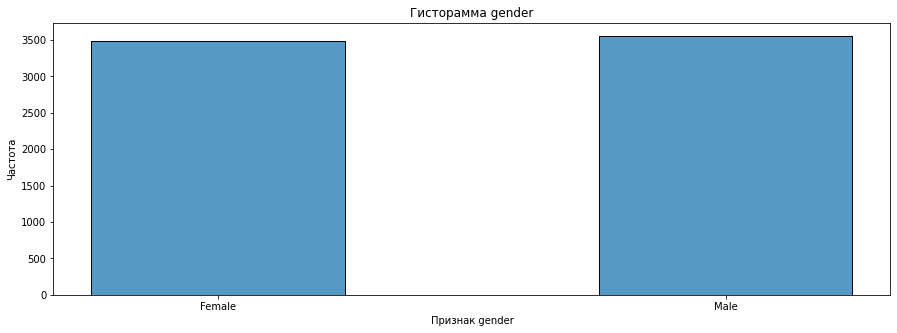

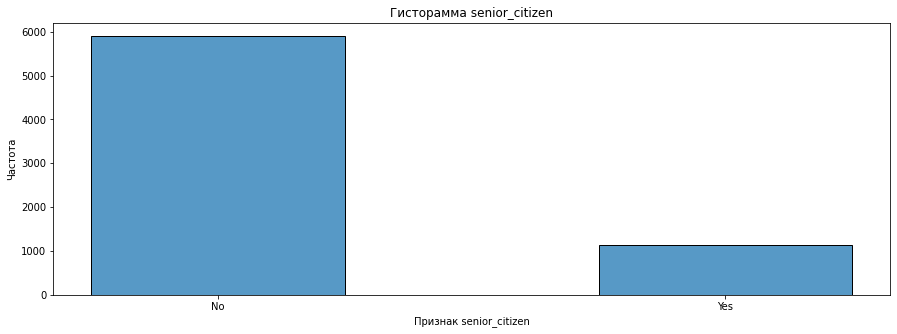

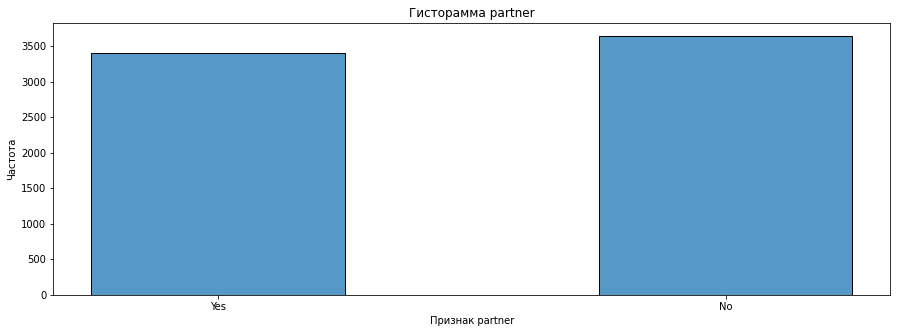

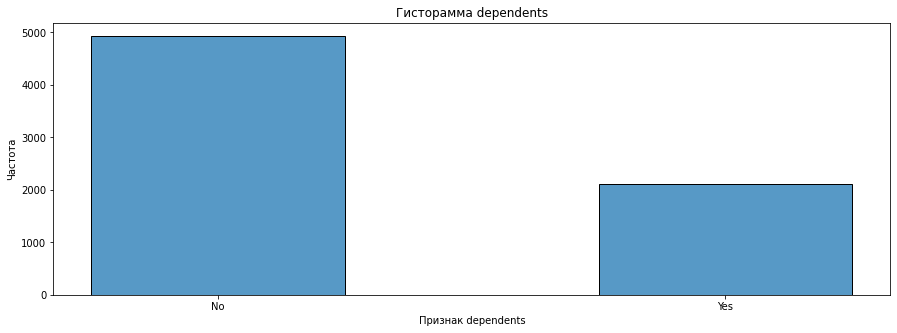

In [51]:
for item in ['gender', 'senior_citizen', 'partner', 'dependents']:
    plt.figure(figsize=(15, 5))
    sns.histplot(data=personal, x=item, multiple='dodge', shrink=0.5)
    plt.ylabel('Частота')
    plt.xlabel(f'Признак {item}')
    plt.title(f'Гисторамма {item}')
    plt.show();

Итак, мы видим, что среди клиентов компании женщин и мужчин примерно поровну, клиентов пенсионного возраста практически в 6 раз меньше, чем более молодых клиентов, незначительная разница в количестве клиентов, у которых есть семьи и одиноких (их чуть больше), и клиентов без детей примерно в 2 раза больше, чем клиентов с детьми.

Другие зависимости посмотрим после объединения датафреймов.

<u>Датафрейм `internet`</u>

In [52]:
internet.sample(10)

,customer_id,internet_service,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies
3744,3717-LNXKW,Fiber optic,Yes,No,No,No,Yes,No
2136,4295-YURET,DSL,Yes,No,No,Yes,Yes,Yes
2377,1406-PUQVY,DSL,No,Yes,No,No,No,No
4069,8382-SHQEH,Fiber optic,No,No,No,No,No,Yes
1190,4472-VESGY,Fiber optic,Yes,Yes,Yes,No,No,Yes
4232,6005-OBZPH,Fiber optic,No,Yes,No,No,Yes,No
4618,6625-IUTTT,DSL,Yes,No,Yes,No,No,Yes
4994,3259-FDWOY,Fiber optic,No,Yes,Yes,No,Yes,Yes
5297,4919-MOAVT,Fiber optic,No,No,No,No,No,No
5074,2474-BRUCM,Fiber optic,Yes,No,No,No,Yes,Yes


Рассмотрим распределение категориальных признаков данного датафрейма, построим гистограммы.

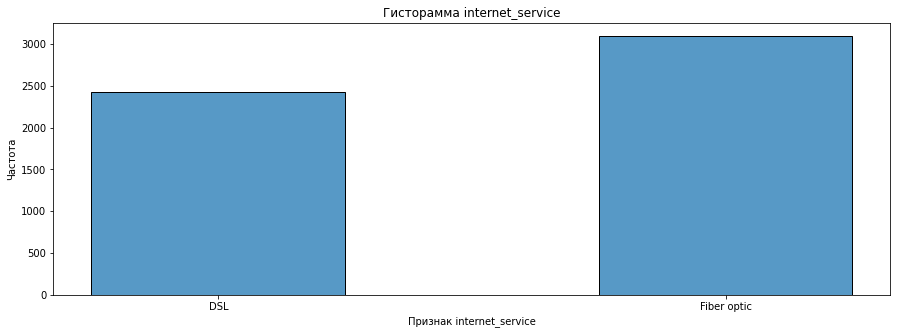

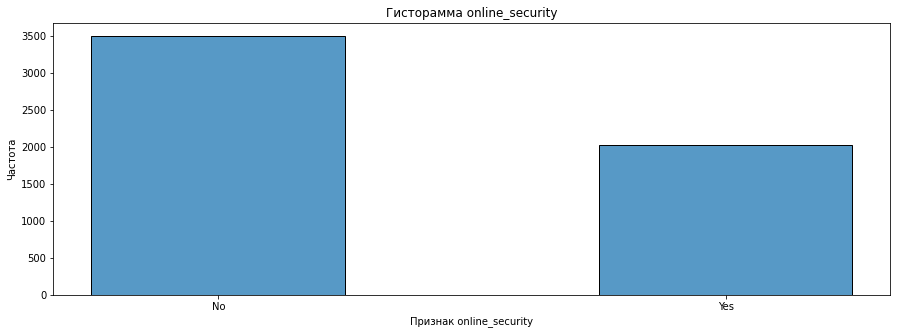

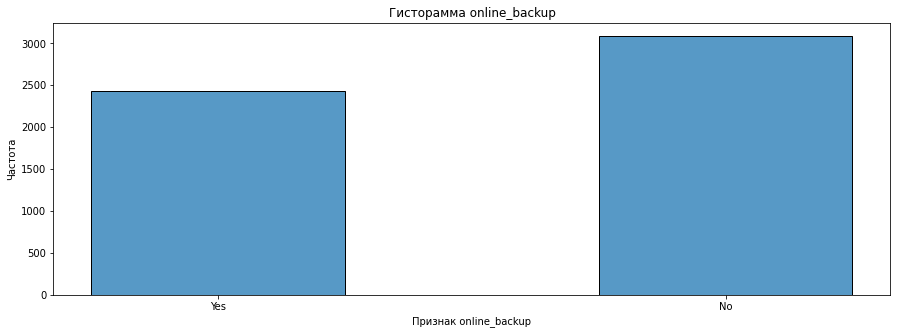

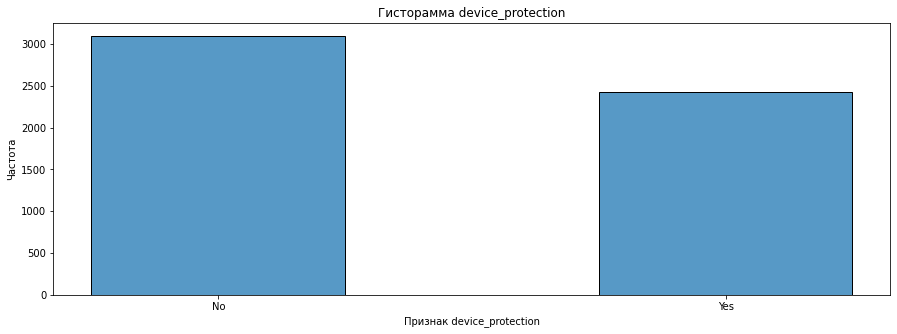

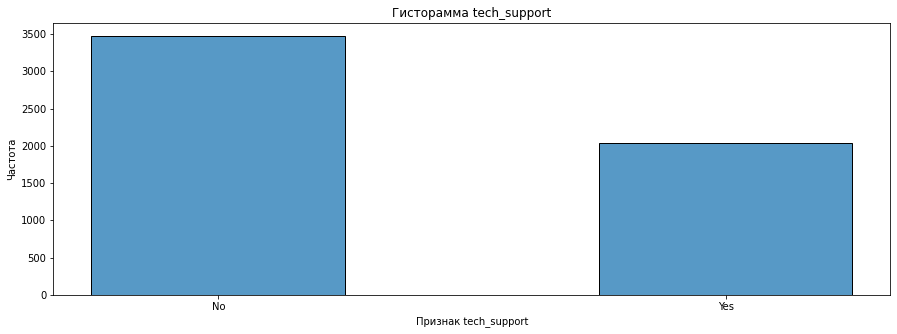

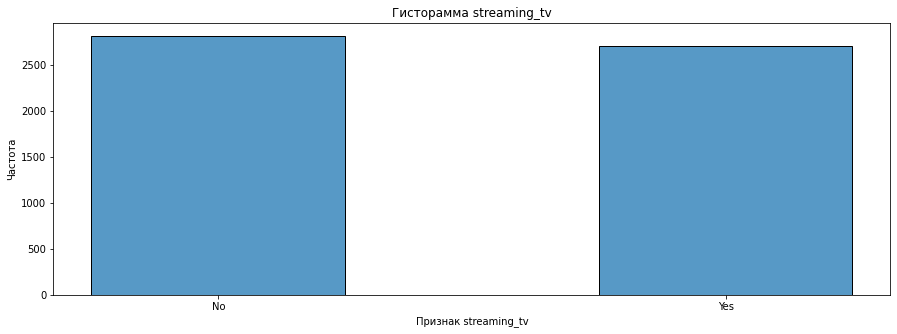

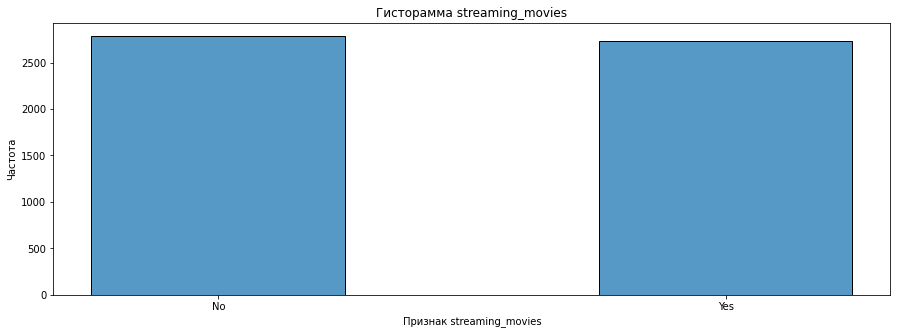

In [53]:
for item in ['internet_service', 'online_security', 
             'online_backup', 'device_protection', 
             'tech_support', 'streaming_tv', 'streaming_movies']:
    plt.figure(figsize=(15, 5))
    sns.histplot(data=internet, x=item, multiple='dodge', shrink=0.5)
    plt.ylabel('Частота')
    plt.xlabel(f'Признак {item}')
    plt.title(f'Гисторамма {item}')
    plt.show();

Исходя из полученных графиков, делаем следующие выводы:

* большинство клентов пользуются оптоволоконным соединением,
* количество клиентов, которые пользуются блокировкой опасных сайтов практически в 2 раза меньше тех, которые этой блокировкой не пользуются,
* облачным хранилищем файлов для резервного копирования данных НЕ пользуется большая часть клиентов,
* антивирусом НЕ пользуется большая часть клиентов,
* количество клиентов, которые пользуются выделенная линия технической поддержки практически в 2 раза меньше тех, которые этой поддержкой не пользуются,
* стриминговым телевидением и каталогом фильмов пользуется примерно одинаковое количество пользователей.

Все эти признаки интересно будет посмотреть в контексте целевой переменной после объединения данных в один датафрейм.

<u>Датафрейм `phone`</u>

In [54]:
phone.sample(10)

,customer_id,multiple_lines
254,3488-PGMQJ,No
3687,1629-DQQVB,No
5260,1162-ECVII,Yes
5018,8174-LNWMW,No
4713,1676-MQAOA,No
1439,7108-DGVUU,Yes
1879,7483-IQWIB,Yes
3888,4123-DVHPH,Yes
5367,6156-UZDLF,No
1832,7639-OPLNG,Yes


Рассмотрим распределение категориальных признаков данного датафрейма, построим гистограмму.

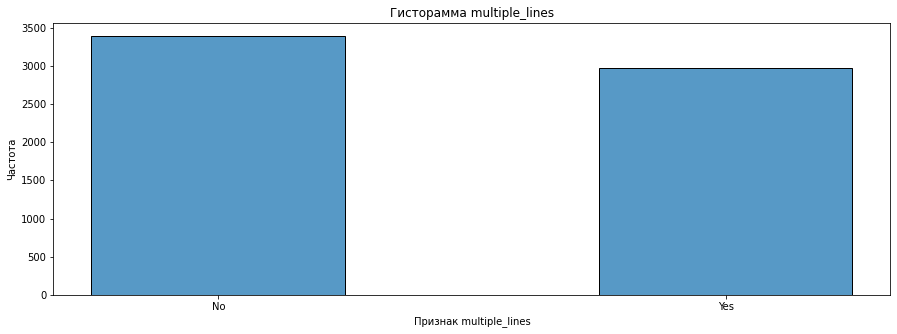

In [55]:
plt.figure(figsize=(15, 5))
sns.histplot(data=phone, x='multiple_lines', multiple='dodge', shrink=0.5)
plt.ylabel('Частота')
plt.xlabel(f'Признак multiple_lines')
plt.title(f'Гисторамма multiple_lines')
plt.show();

Исходя из полученного графика, видим, что подключение телефона к нескольким линиям одновременно используют чуть меньше клиентов, большая часть не пользуется данной услугой.

Здесь тоже будет интересно посмотреть зависимость от целевой переменной после объединения данных в один датафрейм.

**Вывод:**
    
Итак, мы выполнили предобработку данных: изменили формат данных столбцов там, где это было необходимо, изменили некоторые значения для единообразия и в соответствии с описанием данных, привели названия столбцов в соответствие общепринятым стандартам.

Далее мы провели исследовательский анализ каждого датафрейма. Были созданы два дополнительных столбца `target_value` (целевая переменная) и `coop_duration` в датафрейме `contract` и удалены столбцы `begin_date` и `end_date`, на основе которых и были созданы новые признаки. На данном этапе считаем, что все оставшиеся признаки важны для обучения моделей, дальнейшие изменения в данных возможны только после объединения предоставленных датафреймов в один и изучения взаимосвязи признаков с целевой переменной.

## Объединение данных

На данном этапе объединим предоставленные датафреймы в один общий по идентификатору клиента.

In [56]:
# создадим общий датафрейм
data = (
    contract.merge(personal, how='left', on='customer_id')
            .merge(internet, how='left', on='customer_id')
            .merge(phone, how='left', on='customer_id')
)

In [57]:
# посмотрим, что получилось
data.head()

,customer_id,type,paperless_billing,payment_method,monthly_charges,total_charges,target_value,coop_duration,gender,senior_citizen,partner,dependents,internet_service,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,multiple_lines
0,7590-VHVEG,Month-to-month,Yes,Electronic check,29.85,31.04,0,31,Female,No,Yes,No,DSL,No,Yes,No,No,No,No,NaN
1,5575-GNVDE,One year,No,Mailed check,56.95,2071.84,0,1036,Male,No,No,No,DSL,Yes,No,Yes,No,No,No,No
2,3668-QPYBK,Month-to-month,Yes,Mailed check,53.85,226.17,0,123,Male,No,No,No,DSL,Yes,Yes,No,No,No,No,No
3,7795-CFOCW,One year,No,Bank transfer (automatic),42.30,1960.60,0,1371,Male,No,No,No,DSL,Yes,No,Yes,Yes,No,No,NaN
4,9237-HQITU,Month-to-month,Yes,Electronic check,70.70,353.50,0,153,Female,No,No,No,Fiber optic,No,No,No,No,No,No,No


Проверим наличие явных дубликатов в получившемся датафрейме.

In [58]:
data.duplicated().sum()

0

Явных дубликатов нет. 

Установим идентификаторы клиентов в качестве индексов строк датафрейма.

In [59]:
data = data.set_index('customer_id')

In [60]:
# посмотрим, что получилось
data.head()

,type,paperless_billing,payment_method,monthly_charges,total_charges,target_value,coop_duration,gender,senior_citizen,partner,dependents,internet_service,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,multiple_lines
customer_id,,,,,,,,,,,,,,,,,,,
7590-VHVEG,Month-to-month,Yes,Electronic check,29.85,31.04,0,31,Female,No,Yes,No,DSL,No,Yes,No,No,No,No,NaN
5575-GNVDE,One year,No,Mailed check,56.95,2071.84,0,1036,Male,No,No,No,DSL,Yes,No,Yes,No,No,No,No
3668-QPYBK,Month-to-month,Yes,Mailed check,53.85,226.17,0,123,Male,No,No,No,DSL,Yes,Yes,No,No,No,No,No
7795-CFOCW,One year,No,Bank transfer (automatic),42.30,1960.60,0,1371,Male,No,No,No,DSL,Yes,No,Yes,Yes,No,No,NaN
9237-HQITU,Month-to-month,Yes,Electronic check,70.70,353.50,0,153,Female,No,No,No,Fiber optic,No,No,No,No,No,No,No


Посмотрим общую информацию о датафрейме.

In [61]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 7590-VHVEG to 3186-AJIEK
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   type               7043 non-null   object 
 1   paperless_billing  7043 non-null   object 
 2   payment_method     7043 non-null   object 
 3   monthly_charges    7043 non-null   float64
 4   total_charges      7043 non-null   float64
 5   target_value       7043 non-null   int64  
 6   coop_duration      7043 non-null   int64  
 7   gender             7043 non-null   object 
 8   senior_citizen     7043 non-null   object 
 9   partner            7043 non-null   object 
 10  dependents         7043 non-null   object 
 11  internet_service   5517 non-null   object 
 12  online_security    5517 non-null   object 
 13  online_backup      5517 non-null   object 
 14  device_protection  5517 non-null   object 
 15  tech_support       5517 non-null   object 
 16  streaming_tv  

В столбцах `internet_service`, `online_security`, `online_backup`, `device_protection`, `tech_support`, `streaming_tv`, `streaming_movies` и `multiple_lines` имеются пропуски, заменим их значением `No`, поскольку, если не указано иное, учитываем отсутствие использования соответствующих услуг.

In [62]:
data = data.fillna('No')

In [63]:
# посмотрим, что получилось
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 7590-VHVEG to 3186-AJIEK
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   type               7043 non-null   object 
 1   paperless_billing  7043 non-null   object 
 2   payment_method     7043 non-null   object 
 3   monthly_charges    7043 non-null   float64
 4   total_charges      7043 non-null   float64
 5   target_value       7043 non-null   int64  
 6   coop_duration      7043 non-null   int64  
 7   gender             7043 non-null   object 
 8   senior_citizen     7043 non-null   object 
 9   partner            7043 non-null   object 
 10  dependents         7043 non-null   object 
 11  internet_service   7043 non-null   object 
 12  online_security    7043 non-null   object 
 13  online_backup      7043 non-null   object 
 14  device_protection  7043 non-null   object 
 15  tech_support       7043 non-null   object 
 16  streaming_tv  

Пропуски заполнены, таблица готова к дальнейшей работе.

**Вывод:**

Предоставленные датафреймы были объединены в один общий по идентификатору клиента, который далее стал использоваться в качестве индекса получившегося датафрейма. 

При объединении данных в столбцах предоставляемых услуг мы получили пропуски, которые заменили значением `No`, чтобы обозначить отсутствие использования соответствующих услуг.

## Исследовательский анализ и предобработка данных объединённого датафрейма

Выполним исследовательский анализ датафрейма. Для начала выделим числовые и категориальные признаки, чтобы посмотреть их распределение в контексте целевой переменной (`target_value`).

In [64]:
numeric = ['coop_duration', 'monthly_charges', 'total_charges']

In [65]:
categorical = ['type', 'paperless_billing', 'payment_method', 'gender',
       'senior_citizen', 'partner', 'dependents', 'internet_service',
       'online_security', 'online_backup', 'device_protection', 'tech_support',
       'streaming_tv', 'streaming_movies', 'multiple_lines']

In [67]:
target = 'target_value'

Построим графики зависимости числовых признаков в контексте целевой переменной.

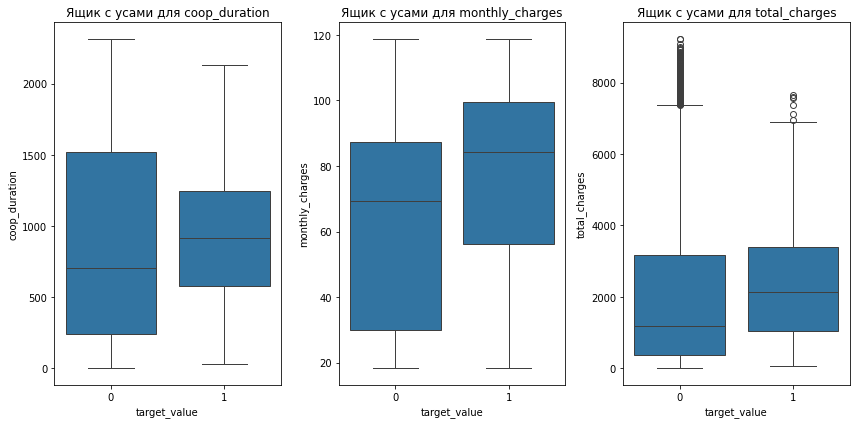

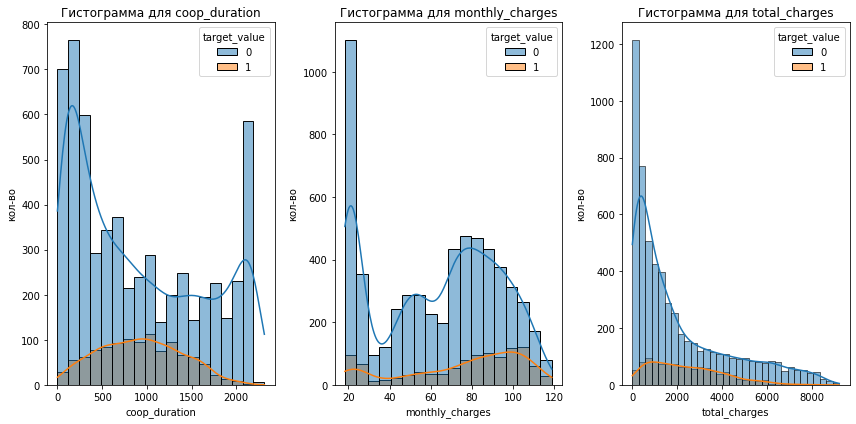

In [68]:
# создание ящиков с усами для каждого числового признака относительно целевой переменной
plt.figure(figsize=(12, 6))
for i, col in enumerate(numeric):
    plt.subplot(1, 3, i+1)
    sns.boxplot(x=target, y=col, data=data)
    plt.title(f'Ящик с усами для {col}')
plt.tight_layout()
plt.show()

# создание гистограмм для каждого числового признака относительно целевой переменной
plt.figure(figsize=(12, 6))
for i, col in enumerate(numeric):
    plt.subplot(1, 3, i+1)
    sns.histplot(data=data, x=col, hue=target, kde=True)
    plt.title(f'Гистограмма для {col}')
    plt.ylabel('кол-во')
plt.tight_layout()
plt.show()

Из получившихся графиков мы видим, что клиентов, которые продолжают пользоваться услугами компании, значительно больше, несмотря на то, что медианное значение в данном случае ниже, клиентов с длительным сроком сотрудничества значительно больше. Они также значительно больше платят за предоставляемые услуги и в целом тратят значительно больше средств, на боксплотах мы можем наблюдать даже аномально высокие затраты в виде значительного количества выбросов.

Теперь построим графики зависимости категориальных признаков в контексте целевой переменной.

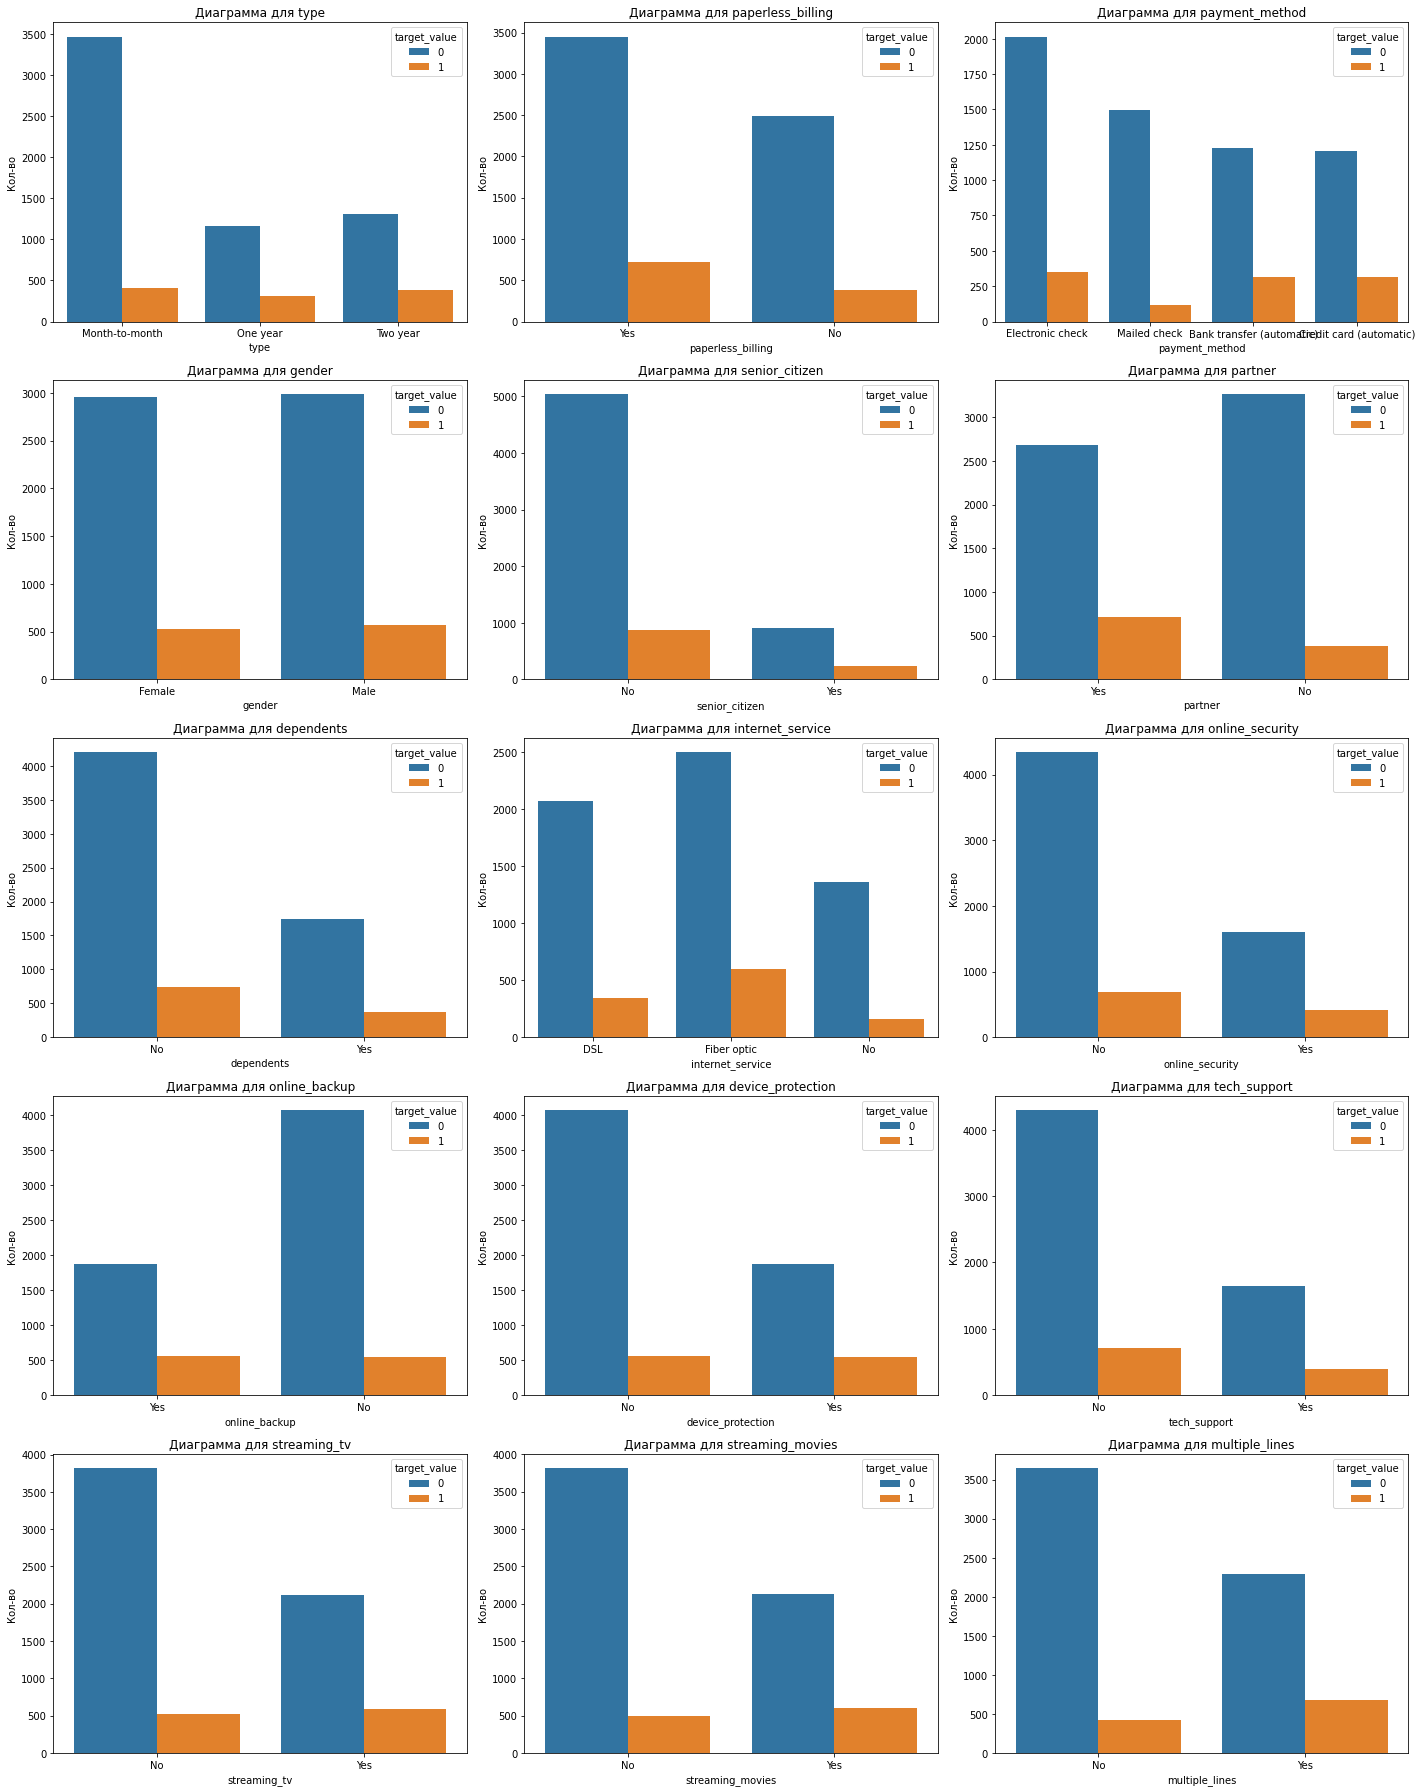

In [69]:
# создание столбчатых диаграмм для каждого категориального признака относительно целевой переменной
nrows = 5
ncols = 3

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(20, 25))

for i, cat_col in enumerate(categorical):
    row = i // ncols
    col = i % ncols
    ax = axes[row, col]
    
    sns.countplot(x=cat_col, hue=target, data=data, ax=ax)
    ax.set_title(f'Диаграмма для {cat_col}')
    ax.set_ylabel('Кол-во')

plt.tight_layout()
plt.show()

Из получившихся графиков можно сделать следующие наблюдения:

* Вероятность ухода клиента примерно одинаковая при любой периодичности оплаты, однако значительная часть клиентов, которые продолжают пользоваться услугами компании, предпочитает ежемесячную форму оплаты. Клиенты, использующие электронные расчетные листы и не использующие таковые, остаются в компании или продолжают пользоваться ее услугами примерно в одинаковом соотношении. Большинство оставшихся клиентов пользуются электронными чеками, меньше всего уходит клиентов, которым выставляют счет по почте, но, вероятно, в целом не так много людей, которым удобен подобный вид оплаты. Два другие способа оплаты примерно одинаково пользуются популярностью у тех, кто остается и кто уходит.

* Останется клиент в компании или нет, не зависит от его пола: примерно одинаковое количество мужчин и женщин остаются и расторгают договоры с компанией.

* Большая часть клиентов, которые продолжают пользоваться услугами компании, не являются пенсионерами. Однако, общее соотношение оставшихся и ушедших клиентов в этих группах примерно одинаковое.

* Продолжают пользоваться услугами компании больше одиноких клиентов и уходят они реже.

* Детей нет у большинства продолжающих сотрудничать клиентов.

* Больше всего клиентов пользуются оптоволоконным соединением, но и уходят они чаще. Вероятно, это обусловлено их большим количеством.

* Большинство оставшихся клиентов не пользуются блокировкой опасных сайтов, облачным хранилищем файлов для резервного копирования данных, антивирусом, выделенной линией технической поддержки, стриминговым телевидением и каталогом фильмов.

Теперь посмотрим зависимость (корреляцию) всех признаков между собой и целевой переменной.

Матрица Phik широко используется для анализа корреляции между переменными в наборах данных. В данном случае мы будем использовать эту матрицу, поскольку она может учитывать корреляцию не только между количественными, но и между категориальными переменными. А нам эту нужно с целью понимания взаимосвязей в данных.

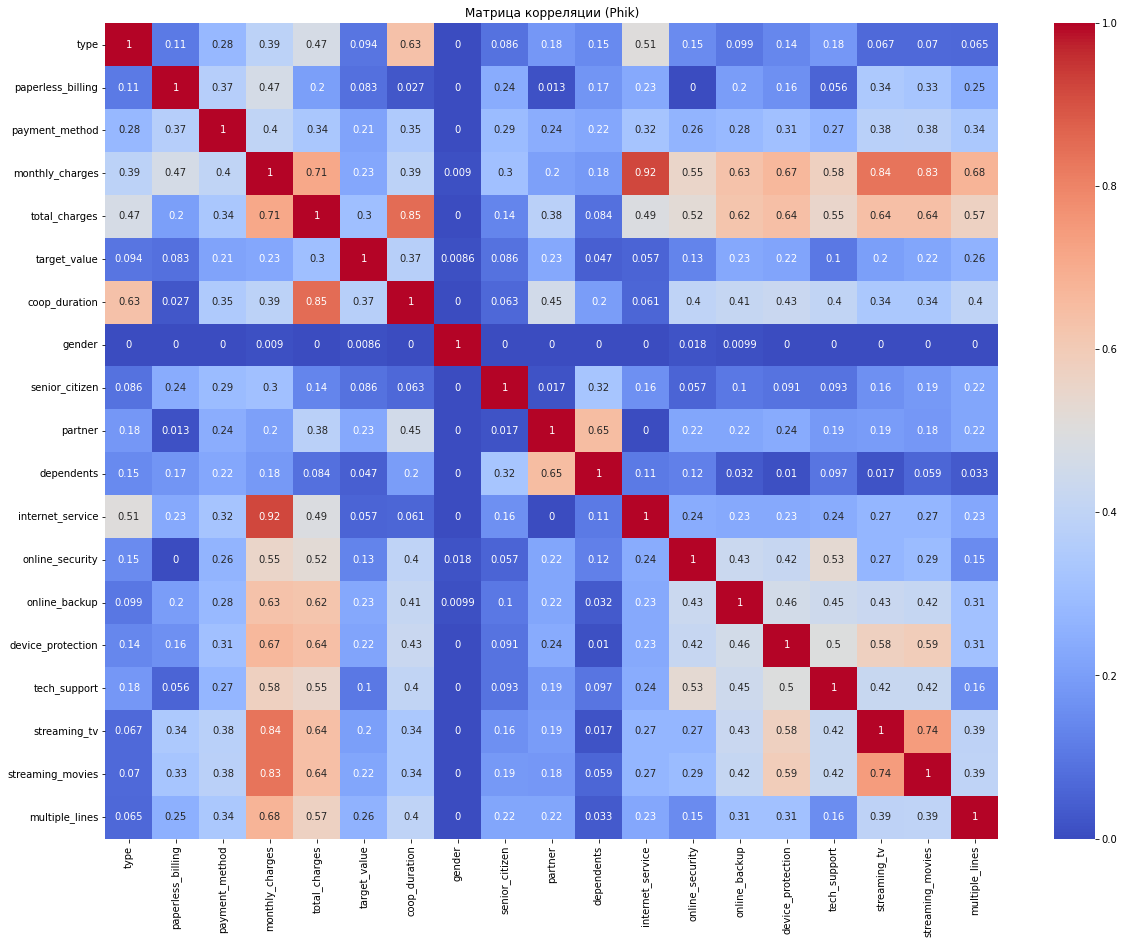

In [70]:
# определим столбцы, которые имеют интервальные значения
interval_cols = numeric

# расчет коэффициентов корреляции Phik
correlation_matrix = phik.phik_matrix(data, interval_cols=interval_cols)

# построение графика корреляции
plt.figure(figsize=(20, 15))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")

plt.title("Матрица корреляции (Phik)")
plt.show();

Как правило, о мультиколлинеарности говорят при значении коэффициента корреляции от `0.9` до `0.95` по модулю. Здесь таких значений мы не наблюдаем.

Итак, мы наблюдаем сильную коррелируют между признаками `internet_service` и `monthly_charges` (*0.92*), что, в целом, логично (больше услуг, больше оплата), по по-моему мнению в данном случае для анализа важны оба признака, поэтому оставим оба, поскольку они имеют различные интерпретации.

Ни один из признаков не коррелирует с целевой переменной.

Однако, ранее было замечено, что пол клиента (`gender`) не влияет на то, продолжит он сотрудничать с компанией или нет, поэтому считаю, что данный признак неважен и его можно удалить (по матрице корреляции мы видим очень низкое значение *0.0086*).

Таким образом, для обучения моделей у нас останутся следующие признаки:

* `type` — тип оплаты,
* `paperless_billing` — электронный расчётный лист,
* `payment_method` — тип платежа,
* `monthly_charges` — расходы за месяц,
* `total_charges` — общие расходы абонента,
* `coop_duration` — длительность сотрудничества,
* `senior_citizen` — является ли абонент пенсионером,
* `partner` — есть ли у абонента супруг или супруга,
* `dependents` — есть ли у абонента дети,
* `internet_service` — тип подключения,
* `online_security` — блокировка опасных сайтов,
* `online_backup` — облачное хранилище файлов для резервного копирования данных,
* `device_protection` — антивирус,
* `tech_support` — выделенная линия технической поддержки,
* `streaming_tv` — стриминговое телевидение,
* `streaming_movies` — каталог фильмов,
* `multiple_lines` — подключение телефона к нескольким линиям одновременно

и 

* `target_value` — продолжает клиент пользоваться услугами компании или нет (целевая переменная).

In [71]:
# удалим столбец пола клиента
data.drop('gender', axis=1, inplace=True)

Посмотрим на датафрейм, с которым будем работать.

In [72]:
data.sample(5)

,type,paperless_billing,payment_method,monthly_charges,total_charges,target_value,coop_duration,senior_citizen,partner,dependents,internet_service,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,multiple_lines
customer_id,,,,,,,,,,,,,,,,,,
7710-JSYOA,Two year,Yes,Bank transfer (automatic),93.30,6630.83,0,2102,No,Yes,Yes,Fiber optic,No,Yes,No,Yes,No,Yes,Yes
1444-VVSGW,One year,No,Credit card (automatic),115.65,3302.96,1,853,No,Yes,No,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Yes
4102-HLENU,Two year,No,Mailed check,65.65,4618.48,0,2041,No,Yes,No,DSL,Yes,Yes,Yes,No,No,No,Yes
6390-DSAZX,Month-to-month,Yes,Mailed check,73.60,229.63,0,92,No,No,Yes,Fiber optic,Yes,No,No,No,No,No,No
1964-SVLEA,One year,Yes,Mailed check,19.70,401.88,0,610,No,No,No,No,No,No,No,No,No,No,No


**Вывод:**

На данном этапе мы объединили предоставленные датафреймы в один общий, проанализировали данные с контексте целевого признака, определили лишний признак, удалили его, теперь датафрейм готов к дальнейшей работе.

## Подготовка данных

Разделим данные на обучающую и тестовую (*0.25*) выборки.

In [73]:
# выделим целевой признак
features = data.drop(['target_value'], axis=1)
target = data['target_value']

In [74]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.25, random_state=RANDOM_STATE)

Проверим размер выборок.

In [75]:
print('Размер выборок:')
print(f'Обучающая выборка: features — {len(X_train)}, target — {len(y_train)}')
print(f'Тестовая выборка: features — {len(X_test)}, target — {len(y_test)}')

Размер выборок:
Обучающая выборка: features — 5282, target — 5282
Тестовая выборка: features — 1761, target — 1761


Подготовим данные для обучения моделей. Обучать будем три модели: `DecisionTreeRegressor`, `CatBoostRegressor` и `LGBMRegressor`.

Модели `CatBoostRegressor` и `LGBMRegressor` работают с категориальными данными, но при использовании `LGBMRegressor` необходимо преобразовать категориальные признаки в специальный формат данных "category", который позволяет ускорить обработку таких признаков внутри алгоритма обучения. Преобразование категориальных признаков в формат "category" может улучшить производительность модели и скорость обучения.

Для других моделей преобразуем признаки с помощью `Ordinal Encoding` и выполним стандартизацию.

Определим категориальные и количественные признаки.

In [76]:
num_features = ['monthly_charges', 'total_charges', 'coop_duration']
cat_features = [
    'type', 'paperless_billing', 'payment_method', 'senior_citizen', 'partner', 
    'dependents', 'internet_service', 'online_security', 'online_backup', 'device_protection',
    'tech_support', 'streaming_tv', 'streaming_movies', 'multiple_lines'
]

Кодируем категориальные признаки.

In [77]:
# обработаем категориальные признаки с использованием OrdinalEncoder
encoder = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=np.nan)

In [78]:
features_train = X_train.copy()
features_test = X_test.copy()

features_train.loc[:, cat_features] = encoder.fit_transform(features_train[cat_features])
features_test.loc[:, cat_features] = encoder.transform(features_test[cat_features])

Теперь выполним стандартизацию.

In [79]:
scaler = StandardScaler()

In [80]:
features_train[num_features] = scaler.fit_transform(features_train[num_features])
features_test[num_features] = scaler.transform(features_test[num_features])

**Выводы:**
    
На данном этапе мы разделили данные на обучающую и тестовую выборки, выделили целевую переменную, определили категориальные и количественные признаки, закодировали и стандартизировали их с учетом особенностей моделей. 

## Обучение моделей машинного обучения

Приступим к обучению моделей. Обучать будем три модели: `LogisticRegression()`, `CatBoostClassifier()` и `LGBMClassifier()`.

### **LogisticRegression()**

In [82]:
# инициализируем модель Logistic Regression
lr = LogisticRegression(random_state=RANDOM_STATE)

# определим параметры для поиска
param_grid_lr = {
    'C': [10, 100, 150, 200],
    'solver': ['liblinear', 'lbfgs'],
    'max_iter': [100, 500, 1000]
}

# инициализируем GridSearchCV и выполним поиск параметров
grid_search_lr = GridSearchCV(lr, param_grid_lr, scoring='roc_auc', cv=5)
grid_search_lr.fit(features_train, y_train)

# вывод результата кросс-валидации
print('Лучшее значение ROC-AUC для Logistic Regression:', grid_search_lr.best_score_)
print('Лучшие параметры модели Logistic Regression:', grid_search_lr.best_params_)
print('Модель Logistic Regression с лучшими найденными параметрами:', grid_search_lr.best_estimator_)

Лучшее значение ROC-AUC для Logistic Regression: 0.7591401764131797
Лучшие параметры модели Logistic Regression: {'C': 10, 'max_iter': 100, 'solver': 'liblinear'}
Модель Logistic Regression с лучшими найденными параметрами: LogisticRegression(C=10, random_state=80424, solver='liblinear')


### **CatBoostClassifier()**

In [83]:
# преобразуем данные из DataFrame в numpy массивы
features_train_array = features_train.values
y_train_array = y_train.values

In [84]:
# инициализируем модель CatBoostClassifier
catboost = CatBoostClassifier(random_state=RANDOM_STATE)

# определим параметры для поиска
param_grid_catboost = {
    'learning_rate': [0.01, 0.1, 0.3],
    'iterations': [100, 200, 300],
    'l2_leaf_reg': [3, 9, 15]
}

# инициализируем GridSearchCV и выполним поиск параметров
# обучим модель
grid_search_catboost = GridSearchCV(catboost, param_grid_catboost, scoring='roc_auc', cv=5)
grid_search_catboost.fit(features_train_array, y_train_array)

print('Лучшее значение ROC-AUC для CatBoostClassifier:', grid_search_catboost.best_score_)
print('Лучшие параметры модели CatBoostClassifier:', grid_search_catboost.best_params_)
print('Модель CatBoostClassifier с лучшими найденными параметрами:', grid_search_catboost.best_estimator_)

0:	learn: 0.6878534	total: 48.1ms	remaining: 4.76s
1:	learn: 0.6829067	total: 50.4ms	remaining: 2.47s
2:	learn: 0.6779914	total: 51.5ms	remaining: 1.67s
3:	learn: 0.6731415	total: 53.1ms	remaining: 1.27s
4:	learn: 0.6685299	total: 54.7ms	remaining: 1.04s
5:	learn: 0.6640764	total: 56.4ms	remaining: 883ms
6:	learn: 0.6596258	total: 58.9ms	remaining: 782ms
7:	learn: 0.6554611	total: 59.8ms	remaining: 688ms
8:	learn: 0.6510420	total: 62.1ms	remaining: 628ms
9:	learn: 0.6468452	total: 64.5ms	remaining: 581ms
10:	learn: 0.6428683	total: 66.8ms	remaining: 540ms
11:	learn: 0.6387517	total: 69ms	remaining: 506ms
12:	learn: 0.6348519	total: 71.2ms	remaining: 477ms
13:	learn: 0.6307112	total: 73.3ms	remaining: 450ms
14:	learn: 0.6268312	total: 75ms	remaining: 425ms
15:	learn: 0.6228743	total: 76.8ms	remaining: 403ms
16:	learn: 0.6189671	total: 78.5ms	remaining: 383ms
17:	learn: 0.6152684	total: 79.6ms	remaining: 363ms
18:	learn: 0.6114696	total: 81.2ms	remaining: 346ms
19:	learn: 0.6076653	total

### **LGBMClassifier()**

In [85]:
# преобразуем категориальные признаки в формат "category" для обучения этой модели
features_train[cat_features] = features_train[cat_features].astype('category')
features_test[cat_features] = features_test[cat_features].astype('category')

In [86]:
# инициализируем модель LGBMClassifier
lgbm = LGBMClassifier(random_state=RANDOM_STATE)

# определим параметры для поиска
param_grid_lgbm = {
    'num_leaves': [31, 127],
    'max_depth': [4, 8],
    'learning_rate': [0.01, 0.1]
}

# инициализируем GridSearchCV и выполним поиск параметров
# обучим модель
grid_search_lgbm = GridSearchCV(lgbm, param_grid_lgbm, scoring='roc_auc', cv=5)
grid_search_lgbm.fit(features_train, y_train)

print('Лучшее значение ROC-AUC для LGBMClassifier:', grid_search_lgbm.best_score_)
print('Лучшие параметры модели LGBMClassifier:', grid_search_lgbm.best_params_)
print('Модель LGBMClassifier с лучшими найденными параметрами:', grid_search_lgbm.best_estimator_)

Лучшее значение ROC-AUC для LGBMClassifier: 0.8609782238760644
Лучшие параметры модели LGBMClassifier: {'learning_rate': 0.1, 'max_depth': 8, 'num_leaves': 31}
Модель LGBMClassifier с лучшими найденными параметрами: LGBMClassifier(max_depth=8)


**Вывод:**
   
Обучены три модели: `LogisticRegression()`, `CatBoostClassifier()` и `LGBMClassifier()`.

Получены следующие значения метрики *ROC-AUC* на обучающей выборке:

In [87]:
models_roc_auc = {
    'LogisticRegression': grid_search_lr.best_score_,
    'CatBoostClassifier': grid_search_catboost.best_score_,
    'LGBMClassifier': grid_search_lgbm.best_score_
}

roc_auc_df = pd.DataFrame(list(models_roc_auc.items()), columns=['Модель', 'ROC-AUC на обучающей выборке'])

print(roc_auc_df)

               Модель  ROC-AUC на обучающей выборке
0  LogisticRegression                      0.759140
1  CatBoostClassifier                      0.898547
2      LGBMClassifier                      0.860978


В результате лучшей выбираем модель `CatBoostClassifier()` со значением метрики *ROC-AUC* на обучающей выборке, равным `0.9`.

## Выбор лучшей модели

Выполним проверку лучшей модели `CatBoostClassifier()` на тестовой выборке, получим ее метрику.

In [112]:
best_catboost_model = grid_search_catboost.best_estimator_

In [113]:
# преобразуем данные тестовой выборки из DataFrame в numpy массивы
features_test_array = features_test.values
y_test_array = y_test.values

In [114]:
# предсказания и вероятности для тестовой выборки
predictions_test = best_catboost_model.predict(features_test_array)
probabilities_test = best_catboost_model.predict_proba(features_test_array)
probabilities_one_test = probabilities_test[:, 1]

# вычисляем ROC-AUC
roc_auc = roc_auc_score(y_test_array, probabilities_one_test)
print('ROC-AUC:', roc_auc)

ROC-AUC: 0.9111529277408638


Итак, на тестовой выборке модель `CatBoostClassifier()` имеет метрику *ROC-AUC* = `0.91` (на обучающей выборке `0.9`)

**Вывод:**

Полученную при выполнении данного проекта модель `CatBoostClassifier()` можно считать пригодной для использования, поскольку качество ее работы, оцениваемое по метрике *ROC-AUC* достаточно высокое как на обучающей, так и на тестовой выборке.

<u>**Лучшая модель** получает следующие значения метрики *ROC-AUC*:</u>

- на обучающей выборке: `0.9`

-  на тестовой выборке: `0.91`

Проанализируем лучшую модель, построив график важности признаков, участвующих в обучении, и матрицу ошибок для тестовой выборки.

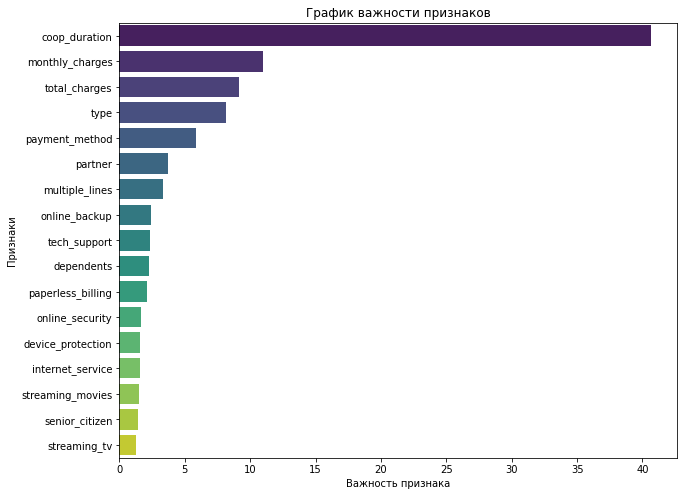

In [124]:
# получение важности признаков
feature_importance = best_catboost_model.feature_importances_

# создание датафрейма для отображения важности признаков
feature_importance_df = pd.DataFrame({'Feature': features.columns, 'Importance': feature_importance})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# построение графика важности признаков
plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df, 
            hue='Feature', palette='viridis', dodge=False, legend=False)
plt.xlabel('Важность признака')
plt.ylabel('Признаки')
plt.title('График важности признаков')
plt.show();

Исходя из получившегося графика можно выделить следующие наиболее важные для обучения модели признаки:
    
- `coop_duration` (длительность сотрудничества) — наиболее важный признак,
- `monthly_charges` (расходы за месяц),
- `total_charges` (общие расходы абонента),
- `type` (тип оплаты),
- `payment_method` (тип платежа).

Остальные признаки не столь важны, от некоторых из них можно избавиться (`online_security` (блокировка опасных сайтов), `device_protection` (антивирус), `internet_service` (тип подключения), `streaming_movies` (каталог фильмов), `senior_citizen` (является ли абонент пенсионером), `streaming_tv` (стриминговое телевидение)). Вероятно, избавление от этих признаков улучшит качество полученной модели.

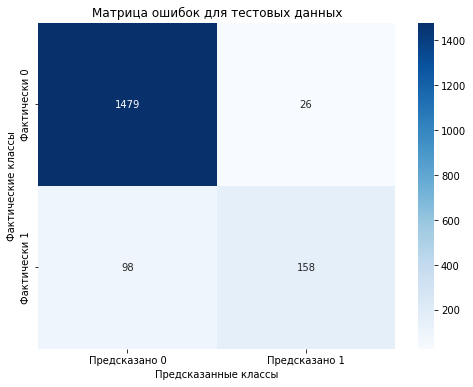

In [127]:
# создание матрицы ошибок для тестовой выборки
conf_matrix_test = confusion_matrix(y_test_array, predictions_test)

# построение матрицы ошибок
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_test, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Предсказано 0', 'Предсказано 1'],
            yticklabels=['Фактически 0', 'Фактически 1'])
plt.xlabel('Предсказанные классы')
plt.ylabel('Фактические классы')
plt.title('Матрица ошибок для тестовых данных')
plt.show();

- True Negative (TN) — 1479: количество правильно предсказанных объектов отрицательного класса (когда для фактически оставшихся клиентов было получено предсказание, что они останутся).
- True Positive (TP) — 158: количество правильно предсказанных объектов положительного класса (когда для фактически ушедших клиентов было получено предсказание, что они уйдут).
- False Positive (FP) — 26: количество неправильно предсказанных объектов положительного класса (когда для фактически оставшихся клиентов было получено предсказание, что они уйдут).
- False Negative (FN) — 98: количество неправильно предсказанных объектов отрицательного класса (когда для фактически ушедших клиентов было получено предсказание, что они останутся).

Из этих данных можно сделать следующие выводы:

1. Модель хорошо предсказывает объекты отрицательного класса (когда клиенты, фактически остающиеся в компании, предсказываются как остающиеся). Возможно, это происходит потому, что в предоставленных данных таких случаев больше.
2. Есть небольшое количество ложных срабатываний как в случае с объектами положительного, так и отрицательного классов (False Positives и False Negatives), что может говорить о том, что модель можно еще улучшить. Возможно, стоит избавиться от наименее важных признаков при обучении модели.

## Общий вывод и рекомендации заказчику

Целью выполнения данного проекта являлось создание модели, которая могла б помочь прогнозировать отток клиентов из компании оператора связи "ТелеДом". Оператор предоставляет услуги стационарной телефонной связи и Интернет, кроме того предлагаются дополнительные услуги: антивирус, блокировка небезопасных сайтов, выделенная линия технической поддержки, облачное хранилище файлов для резервного копирования данных, стриминговое телевидение и каталог фильмов.

Для работы было предоставлено четыре датафрейма, содержащие информацию о договоре, персональные данные клиентов, информацию об интернет-услугах и информацию об услугах телефонии.

В ходе ознакомления с датафреймами был изменен формат некоторых данных в соответствии с описанием задачи, проведен исследовательский анализ, в ходе которого был получен целевой признак на основе даты завершения контрактов с оператором, сформирован новый признак длительности сотрудничества с компанией, удалены признаки, использованные для формирования новых данных как избыточные. Далее предоставленные датафреймы были объединены в один общий по идентификатору клиента. В общем датафрейме были обработаны пропуски, также был проведен исследовательский анализ, в результате которого был удален признак пола как наиболее неинформативный для обучения моделей. Оставшиеся признаки были закодированы и стандартизированы.

Было принято решение обучить три модели: `LogisticRegression()`, `CatBoostClassifier()` и `LGBMClassifier()`. По результатам обучения лучшей была признана модель `CatBoostClassifier()`, которая получила значение метрики *ROC-AUC*, равное `0.9` на обучающий выборке и `0.91` на тестовой. Далее был проведен анализ модели с использованием графика важности признаков, участвующих в обучении, и матрицы ошибок.


Для обучения моделей использовались следующие признаки: `type` (тип оплаты), `paperless_billing` (электронный расчётный лист), `payment_method` (тип платежа), `monthly_charges` (расходы за месяц), `total_charges` (общие расходы абонента), `coop_duration` (длительность сотрудничества), `senior_citizen` (является ли абонент пенсионером), `partner` (есть ли у абонента супруг или супруга), `dependents` (есть ли у абонента дети), `internet_service` (тип подключения), `online_security` (блокировка опасных сайтов), `online_backup` (облачное хранилище файлов для резервного копирования данных), `device_protection` (антивирус), `tech_support` (выделенная линия технической поддержки), `streaming_tv` (стриминговое телевидение), `streaming_movies` (каталог фильмов), `multiple_lines` (подключение телефона к нескольким линиям одновременно).

Наиболее важными признаками являются: `coop_duration` (длительность сотрудничества), `monthly_charges` (расходы за месяц), `total_charges` (общие расходы абонента), `type` (тип оплаты), `payment_method` (тип платежа).

Метрика *ROC-AUC* на тестовой выборке, равная `0.91` и полученная для модели `CatBoostClassifier()`, созданной для прогнозирования оттока клиентов в компании, говорит о том, что данная модель хорошо справляется с задачей. Значение *ROC-AUC* в диапазоне от `0.5` до `1.0`, где значение `1.0` означает идеальную модель, а `0.5` — модель, эквивалентную случайному предсказанию, указывает на высокое качество полученной модели. Более того, полученное значение метрики удовлетворяет условию поставленной задачи (получить значение метрики `0.85 <= ROC-AUC`). Модель `CatBoostClassifier()` в данном случае показывает высокую точность и хорошо разделяет классы (клиентов, которые уйдут, и тех, кто останется). Наиболее точно модель предсказывает объекты отрицательного класса (когда клиенты, фактически остающиеся в компании, предсказываются как остающиеся).

Эту модель можно использовать для работы, поскольку она демонстрирует хорошие результаты по метрике *ROC-AUC*. Однако рекомендуется продолжать мониторить ее производительность и качество, возможно, проводя дополнительные тесты на новых данных или сравнивая с другими моделями для выбора оптимального варианта.

**Рекомендации для бизнеса**

1. Персонализированный подход: разработка индивидуальных предложений и специальных тарифов, учитывая потребности каждого клиента.

2. Программы лояльности: создание программ лояльности, предоставление скидок, бонусов или подарков за долгосрочное пользование услугами оператора.

3. Качественное обслуживание: обеспечение высокого уровня обслуживания клиентов, оперативное решение проблем и быстрая поддержка.

4. Акции и специальные предложения: регулярное проведение акций, скидок и специальных предложений для существующих клиентов.

5. Мониторинг уровня удовлетворенности: проведение опросов и анкетирования клиентов для выявления и устранения возможных проблем или недовольств.

6. Предложение дополнительных услуг: анализ поведения клиентов для предложения дополнительных услуг или пакетов, которые могут их заинтересовать.

7. Постоянное информирование: регулярное информирование клиентов о новых услугах, тарифах и возможностях оператора связи.

8. Своевременное реагирование на отток: мониторинг показателей оттока и принятие мер для удержания клиентов до их ухода к конкурентам.

Эти рекомендации помогут оператору связи удерживать клиентов и создавать долгосрочные отношения с ними.